# Data Preprocessing

## Import libraries and data

In [61]:
import numpy as np                      
import pandas as pd 
import plotly.graph_objects as go


#Let's first clean the dataset and keep valid entries with known latitude and longitude
data = pd.read_csv('input/Meteorite_Landings.csv')
data = data[(data.reclat != 0.0) & (data.reclong != 0.0)]

#Keep only the valid entries (meteorites that have not been highly degraded by weather on Earth)
data = data.groupby('nametype').get_group('Valid').copy()
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31684 entries, 0 to 45715
Data columns (total 10 columns):
name           31684 non-null object
id             31684 non-null int64
nametype       31684 non-null object
recclass       31684 non-null object
mass (g)       31684 non-null float64
fall           31684 non-null object
year           31684 non-null object
reclat         31684 non-null float64
reclong        31684 non-null float64
GeoLocation    31684 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 2.7+ MB


In [62]:
#Look at data before preprocessing
data.head(3)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1/1/1951 0:00,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1/1/1952 0:00,54.21667,-113.00000,"(54.21667, -113.0)"


In [89]:
 print("number of meteorite classes:", data['recclass'].value_counts().count())

number of meteorite classes: 388


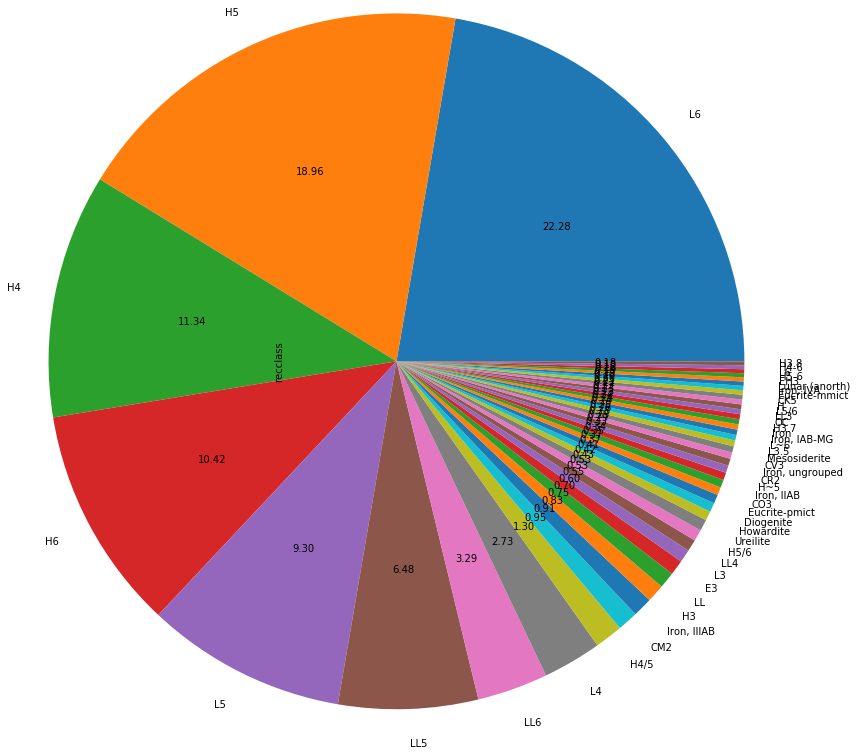

In [64]:
#Plot the distribution of meteorite classes
data_class = data['recclass'].value_counts()
data_class[data_class > 50.0].plot.pie(autopct='%.2f', radius=4)

### We now face the biggest issue in this dataset, very unbalanced classes. This problem affects all types of analysis, not having enough varied information makes the ability to generalize and to make useful inferences quite difficult.

## Transform categorical variables to numeric

We start to solve this problem by means of grouping the 388 classes into 12 different meteorite categories. (Using the link https://en.wikipedia.org/wiki/Meteorite_classification and with the help of the Kaggle kernel: https://www.kaggle.com/pylablanche/meteorite-landings-simple-analysis )

In [0]:
data.insert(loc=4, column='recclass1', value=data.recclass )
data.insert(loc=5, column='recclass2', value=data.recclass )


In [0]:
replace_map_script = {'Acapulcoite':1, 'Acapulcoite/Lodranite':2, 'Acapulcoite/lodranite':3, 'Lodranite':4,'Lodranite-an':5,'Winonaite':6,'Achondrite-prim':7,'Angrite':8, 'Aubrite':9,'Aubrite-an':10,'Ureilite':11, 'Ureilite-an':12,'Ureilite-pmict':13, 'Brachinite':14,'Diogenite':15, 'Diogenite-an':16, 'Diogenite-olivine':17, 'Diogenite-pm':18, 'Eucrite':19, 'Eucrite-Mg rich':20, 'Eucrite-an':21, 'Eucrite-br':22,'Eucrite-cm':23, 'Eucrite-mmict':24, 'Eucrite-pmict':25, 'Eucrite-unbr':26,'Howardite':27, 'Lunar':28, 'Lunar (anorth)':29, 'Lunar (bas. breccia)':30, 'Lunar (bas/anor)':31, 'Lunar (bas/gab brec)':32, 'Lunar (basalt)':33, 'Lunar (feldsp. breccia)':34, 'Lunar (gabbro)':35, 'Lunar (norite)':36, 'Martian':37, 'Martian (OPX)':38,'Martian (chassignite)':39, 'Martian (nakhlite)':40, 'Martian (shergottite)':41,'C':42,'C2':43,'C4':44,'C4/5':45,'C6':46,'C1-ung':47, 'C1/2-ung':48,'C2-ung':49, 'C3-ung':50, 'C3/4-ung':51,'C4-ung':52,'C5/6-ung':53, 'CB':54, 'CBa':55, 'CBb':56, 'CH/CBb':57, 'CH3':58, 'CH3 ':59, 'CI1':60, 'CK':61, 'CK3':62,'CK3-an':63, 'CK3.8':64, 'CK3/4':65, 'CK4':66, 'CK4-an':67, 'CK4/5':68, 'CK5':69, 'CK5/6':70, 'CK6':71, 'CM':72, 'CM-an':73, 'CM1':74, 'CM1/2':75, 'CM2':76, 'CM2-an':77, 'CO3':78, 'CO3 ':79, 'CO3.0':80, 'CO3.1':81, 'CO3.2':82, 'CO3.3':83, 'CO3.4':84, 'CO3.5':85, 'CO3.6':86, 'CO3.7':87, 'CO3.8':88, 'CR':89, 'CR-an':90, 'CR1':91, 'CR2':92, 'CR2-an':93, 'CV2':94, 'CV3':95, 'CV3-an':96, 'OC':97, 'OC3':98,'Relict H':99,'Relict OC':100, 'EH':101,'EH-imp melt':102, 'EH3':103, 'EH3/4-an':104, 'EH4':105, 'EH4/5':106, 'EH5':107, 'EH6':108, 'EH6-an':109, 'EH7':110, 'EH7-an':111, 'EL3':112, 'EL3/4':113, 'EL4':114, 'EL4/5':115, 'EL5':116, 'EL6':117, 'EL6 ':118, 'EL6/7':119, 'EL7':120,'E':121,'E3':122,'E4':123, 'E5':124,'E6':125, 'K':126, 'K3':127,'R':128, 'R3':129, 'R3-4':130, 'R3-5':131, 'R3-6':132, 'R3.4':133, 'R3.5-6':134, 'R3.6':135, 'R3.7':136, 'R3.8':137, 'R3.8-5':138, 'R3.8-6':139, 'R3.9':140, 'R3/4':141, 'R4':142, 'R4/5':143, 'R5':144, 'R6':145,'Pallasite':146, 'Pallasite, PES':147,'Pallasite, PMG':148, 'Pallasite, PMG-an':149, 'Pallasite, ungrouped':150, 'Pallasite?':151,'Mesosiderite':152, 'Mesosiderite-A':153,'Mesosiderite-A1':154, 'Mesosiderite-A2':155, 'Mesosiderite-A3':156,'Mesosiderite-A3/4':157, 'Mesosiderite-A4':158, 'Mesosiderite-B':159,'Mesosiderite-B1':160, 'Mesosiderite-B2':161, 'Mesosiderite-B4':162,'Mesosiderite-C':163, 'Mesosiderite-C2':164, 'Mesosiderite-an':165,'Mesosiderite?':166, 'Iron, IC':167, 'Iron, IC-an':168, 'Iron, IIAB':169, 'Iron, IIAB-an':170, 'Iron, IIC':171, 'Iron, IID':172, 'Iron, IID-an':173,'Iron, IIF':174, 'Iron, IIG':175, 'Iron, IIIAB':176, 'Iron, IIIAB-an':177, 'Iron, IIIAB?':178, 'Iron, IIIE':179, 'Iron, IIIE-an':180, 'Iron, IIIF':181, 'Iron, IVA':182, 'Iron, IVA-an':183, 'Iron, IVB':184,'Iron, IAB complex':185, 'Iron, IAB-MG':186,'Iron, IAB-an':187, 'Iron, IAB-sHH':188, 'Iron, IAB-sHL':189, 'Iron, IAB-sLH':190,'Iron, IAB-sLL':191, 'Iron, IAB-sLM':192, 'Iron, IAB-ung':193, 'Iron, IAB?':194,'Iron, IIE':195, 'Iron, IIE-an':196, 'Iron, IIE?':197,'Iron':198,'Iron?':199,'Relict iron':200,'Chondrite-fusion crust':201, 'Fusion crust':202,'Impact melt breccia':203, 'Enst achon-ung':204,'Iron, ungrouped':205,'Stone-uncl':206, 'Stone-ung':207, 'Unknown-Ungrouped':208,'Achondrite-ung':209,'Chondrite-ung':210, 'Enst achon':211,'E-an':212, 'E3-an':213, 'E5-an':214,'H':215, 'H(5?)':216, 'H(?)4':217, 'H(L)3':218, 'H(L)3-an':219, 'H-an':220,'H-imp melt':221, 'H-melt rock':222, 'H-metal':223, 'H/L3':224, 'H/L3-4':225, 'H/L3.5':226, 'H/L3.6':227, 'H/L3.7':228, 'H/L3.9':229, 'H/L4':230, 'H/L4-5':231, 'H/L4/5':232, 'H/L5':233, 'H/L6':234, 'H/L6-melt rock':235, 'H/L~4':236, 'H3':237, 'H3 ':238, 'H3-4':239, 'H3-5':240, 'H3-6':241, 'H3-an':242, 'H3.0':243, 'H3.0-3.4':244, 'H3.1':245, 'H3.10':246, 'H3.2':247, 'H3.2-3.7':248, 'H3.2-6':249, 'H3.2-an':250, 'H3.3':251, 'H3.4':252, 'H3.4-5':253, 'H3.4/3.5':254, 'H3.5':255, 'H3.5-4':256, 'H3.6':257, 'H3.6-6':258, 'H3.7':259, 'H3.7-5':260, 'H3.7-6':261, 'H3.7/3.8':262, 'H3.8':263, 'H3.8-4':264, 'H3.8-5':265, 'H3.8-6':266, 'H3.8-an':267, 'H3.8/3.9':268, 'H3.8/4':269, 'H3.9':270, 'H3.9-5':271, 'H3.9-6':272, 'H3.9/4':273, 'H3/4':274, 'H4':275, 'H4 ':276, 'H4(?)':277, 'H4-5':278, 'H4-6':279, 'H4-an':280, 'H4/5':281, 'H4/6':282, 'H5':283, 'H5 ':284, 'H5-6':285, 'H5-7':286, 'H5-an':287, 'H5-melt breccia':288, 'H5/6':289, 'H6':290, 'H6 ':291, 'H6-melt breccia':292, 'H6/7':293, 'H7':294, 'H?':295,'H~4':296, 'H~4/5':297, 'H~5':298, 'H~6':299,'L':300, 'L(?)3':301,'L(H)3':302, 'L(LL)3':303, 'L(LL)3.05':304, 'L(LL)3.5-3.7':305, 'L(LL)5':306, 'L(LL)6':307, 'L(LL)~4':308, 'L-imp melt':309, 'L-melt breccia':310, 'L-melt rock':311, 'L-metal':312, 'L/LL':313, 'L/LL(?)3':314, 'L/LL-melt rock':315, 'L/LL3':316, 'L/LL3-5':317, 'L/LL3-6':318, 'L/LL3.10':319, 'L/LL3.2':320, 'L/LL3.4':321, 'L/LL3.5':322, 'L/LL3.6/3.7':323, 'L/LL4':324, 'L/LL4-6':325, 'L/LL4/5':326, 'L/LL5':327, 'L/LL5-6':328, 'L/LL5/6':329, 'L/LL6':330, 'L/LL6-an':331, 'L/LL~4':332, 'L/LL~5':333, 'L/LL~6':334, 'L3':335, 'L3-4':336, 'L3-5':337, 'L3-6':338, 'L3-7':339, 'L3.0':340, 'L3.0-3.7':341, 'L3.0-3.9':342, 'L3.05':343, 'L3.1':344, 'L3.10':345, 'L3.2':346, 'L3.2-3.5':347, 'L3.2-3.6':348, 'L3.3':349, 'L3.3-3.5':350, 'L3.3-3.6':351, 'L3.3-3.7':352, 'L3.4':353, 'L3.4-3.7':354, 'L3.5':355, 'L3.5-3.7':356, 'L3.5-3.8':357, 'L3.5-3.9':358, 'L3.5-5':359, 'L3.6':360, 'L3.6-4':361, 'L3.7':362, 'L3.7-3.9':363, 'L3.7-4':364, 'L3.7-6':365, 'L3.7/3.8':366, 'L3.8':367, 'L3.8-5':368, 'L3.8-6':369, 'L3.8-an':370, 'L3.9':371, 'L3.9-5':372, 'L3.9-6':373, 'L3.9/4':374, 'L3/4':375, 'L4':376, 'L4 ':377, 'L4-5':378, 'L4-6':379, 'L4-an':380, 'L4-melt rock':381, 'L4/5':382, 'L5':383, 'L5 ':384, 'L5-6':385, 'L5-7':386, 'L5/6':387, 'L6':388, 'L6 ':389, 'L6-melt breccia':390, 'L6-melt rock':391, 'L6/7':392, 'L7':393,'L~3':394, 'L~4':395, 'L~5':396, 'L~6':397,'LL':398, 'LL(L)3':399, 'LL-melt rock':400, 'LL3':401, 'LL3-4':402, 'LL3-5':403, 'LL3-6':404, 'LL3.0':405, 'LL3.00':406, 'LL3.1':407, 'LL3.1-3.5':408, 'LL3.10':409, 'LL3.15':410, 'LL3.2':411, 'LL3.3':412, 'LL3.4':413, 'LL3.5':414, 'LL3.6':415, 'LL3.7':416, 'LL3.7-6':417, 'LL3.8':418, 'LL3.8-6':419, 'LL3.9':420, 'LL3.9/4':421, 'LL3/4':422, 'LL4':423, 'LL4-5':424, 'LL4-6':425, 'LL4/5':426, 'LL4/6':427, 'LL5':428, 'LL5-6':429, 'LL5-7':430, 'LL5/6':431, 'LL6':432, 'LL6 ':433, 'LL6(?)':434, 'LL6/7':435, 'LL7':436, 'LL7(?)':437, 'LL<3.5':438, 'LL~3':439, 'LL~4':440, 'LL~4/5':441, 'LL~5':442, 'LL~6':452}
data['recclass'] = data['recclass'].map(replace_map_script)

In [0]:
data.recclass1.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim'],value='Achondrite_prim',inplace=True)

data.recclass1.replace(to_replace=['Angrite', 'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite'],value='Achondrite_aste',inplace=True)

data.recclass1.replace(to_replace=['Lunar', 'Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)'],value='Lunar',inplace=True)

data.recclass1.replace(to_replace=['Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)'],value='Martian',inplace=True)

data.recclass1.replace(to_replace=['C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung',
           'CB', 'CBa', 'CBb', 'CH/CBb', 'CH3', 'CH3 ', 'CI1', 'CK', 'CK3',
           'CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an'],value='Chondrite_carbon',inplace=True)

data.recclass1.replace(to_replace=['OC', 'OC3','H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6','L', 'L(?)3',
           'L(H)3', 'L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'L3', 'L3-4', 'L3-5',
           'L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7', 'LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6',
           'L~3', 'L~4', 'L~5', 'L~6','Relict H','Relict OC'],value='Chondrite_ordin',inplace=True)

data.recclass1.replace(to_replace=['EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6'],value='Chondrite_enst',inplace=True)

data.recclass1.replace(to_replace=['K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6'],value='Chondrite_other',inplace=True)

data.recclass1.replace(to_replace=['Pallasite', 'Pallasite, PES','Pallasite, PMG',
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?'],value='Pallasite',inplace=True)

data.recclass1.replace(to_replace=['Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?'],value='Mesosiderite',inplace=True)

data.recclass1.replace(to_replace=['Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB'],value='Magmatic',inplace=True)

data.recclass1.replace(to_replace=['Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?'],value='Non_magmatic',inplace=True)

data.recclass1.replace(to_replace=['Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an'],value='Unknown-Ungrouped',inplace=True)



In [0]:
replace_map1 = {'Chondrite_ordin':1, 
'Achondrite_aste':2,
'Chondrite_carbon':3,
'Magmatic':4,
'Chondrite_enst':5,
'Unknown-Ungrouped':6,
'Non_magmatic':7,
'Mesosiderite':8,
'Lunar':9,
'Pallasite':10,
'Achondrite_prim':11,
'Martian':12,
'Chondrite_other':13}

data['recclass1'] = data['recclass1'].map(replace_map1)

In [0]:
data.recclass2.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim','Angrite',
           'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite',
           'Lunar', 'Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)',
           'Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)','C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung', 'CB', 'CBa', 'CBb', 'CH/CBb',
           'CH3', 'CH3 ', 'CI1', 'CK', 'CK3','CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an', 'OC', 'OC3','Relict H','Relict OC',
           'EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6',
           'K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6','Pallasite', 'Pallasite, PES','Pallasite, PMG',
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?','Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?',
           'Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB','Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?','Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an'],value='Others',inplace=True)

data.recclass2.replace(to_replace=['H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6'],value='H',inplace=True)

data.recclass2.replace(to_replace=['L', 'L(?)3','L(H)3', 'L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'L3', 'L3-4', 'L3-5',
           'L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7','L~3', 'L~4', 'L~5', 'L~6'],value='L',inplace=True)

data.recclass2.replace(to_replace=['LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6'],value='LL',inplace=True)



In [0]:
#Convert recclass2 into a one-hot vector
data['recclass2'] = data['recclass2'].astype('category')
data = pd.get_dummies(data, columns=['recclass2'])


In [0]:
#Drop invalid years
data["year"] = pd.to_datetime(data["year"], errors='coerce')
data = data.dropna()
data['year'] = (pd.DatetimeIndex(data['year']).year)

In [0]:
#Convert fall into a one-hot vector
data['fall'] = data['fall'].astype('category')
data = pd.get_dummies(data, columns=['fall'])

In [0]:
#Convert mass values to int
data.rename(columns={'mass (g)': 'mass'}, inplace=True)
data['mass'] = data['mass'].astype(int)

In [74]:
#Take a look to the data
data.head(5)

,name,id,nametype,recclass,recclass1,mass,year,reclat,reclong,GeoLocation,recclass2_H,recclass2_L,recclass2_LL,recclass2_Others,fall_Fell,fall_Found
0,Aachen,1,Valid,383,1,21,1880,50.77500,6.08333,"(50.775, 6.08333)",0,1,0,0,1,0
1,Aarhus,2,Valid,290,1,720,1951,56.18333,10.23333,"(56.18333, 10.23333)",1,0,0,0,1,0
2,Abee,6,Valid,105,5,107000,1952,54.21667,-113.00000,"(54.21667, -113.0)",0,0,0,1,1,0
3,Acapulco,10,Valid,1,11,1914,1976,16.88333,-99.90000,"(16.88333, -99.9)",0,0,0,1,1,0
4,Achiras,370,Valid,388,1,780,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",0,1,0,0,1,0


## Drop unnecessary columns

In [75]:
data = data.drop(columns=["id","name","GeoLocation","nametype"])
data.reset_index()
data.head()

,recclass,recclass1,mass,year,reclat,reclong,recclass2_H,recclass2_L,recclass2_LL,recclass2_Others,fall_Fell,fall_Found
0,383,1,21,1880,50.77500,6.08333,0,1,0,0,1,0
1,290,1,720,1951,56.18333,10.23333,1,0,0,0,1,0
2,105,5,107000,1952,54.21667,-113.00000,0,0,0,1,1,0
3,1,11,1914,1976,16.88333,-99.90000,0,0,0,1,1,0
4,388,1,780,1902,-33.16667,-64.95000,0,1,0,0,1,0


In [0]:
#save preprocessed data in a csv
data.to_csv("output/Meteorite_Landings_Preprocessed.csv")

# Model training

As explained before, the biggest problem with this dataset is the unbalanced classes. After some researching, we found a very promising algorithm called Synthetic Minority Over-sampling Technique [1]. As its name suggests, SMOTE is an oversampling method. It works by creating synthetic samples from the minor class until all classes of the dataset are balanced.

[1] Chawla, N. V. et al. “SMOTE: Synthetic Minority Over-Sampling Technique.” Journal of Artificial Intelligence Research 16 (2002): 321–357. Crossref. Web.


## SMOTE (Synthetic Minority Over-sampling Technique)

In [77]:
#Extract the classes and save it as y
y = data["recclass"]
y.head()

0    383
1    290
2    105
3      1
4    388
Name: recclass, dtype: int64

In [78]:
#Delete classes and save it as x
x = data.drop(columns=["recclass"])
x.head()

,recclass1,mass,year,reclat,reclong,recclass2_H,recclass2_L,recclass2_LL,recclass2_Others,fall_Fell,fall_Found
0,1,21,1880,50.77500,6.08333,0,1,0,0,1,0
1,1,720,1951,56.18333,10.23333,1,0,0,0,1,0
2,5,107000,1952,54.21667,-113.00000,0,0,0,1,1,0
3,11,1914,1976,16.88333,-99.90000,0,0,0,1,1,0
4,1,780,1902,-33.16667,-64.95000,0,1,0,0,1,0


Now we use the python package "smote_variants" [2] developed to train and sample 85 different variations of the SMOTE algorithm.



[2] Kovács, György. (2019). smote-variants: a Python Implementation of 85 Minority Oversampling Techniques. Neurocomputing. 10.1016/j.neucom.2019.06.100. 

In [79]:
#Call the multiclass oversapling method, fit and sample 
import smote_variants as sv
import sklearn.datasets as datasets

oversampler= sv.MulticlassOversampling(sv.distance_SMOTE())

X_samp, y_samp= oversampler.sample(x,y)

2019-10-20 16:51:31,941:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2019-10-20 16:51:31,947:INFO:MulticlassOversampling: Sampling minority class with label: 283
2019-10-20 16:51:31,951:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-10-20 16:51:32,026:INFO:MulticlassOversampling: Sampling minority class with label: 275
2019-10-20 16:51:32,031:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.3292883587001234, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-10-20 16:51:32,146:INFO:MulticlassOversampling: Sampling minority class with label: 290
2019-10-20 16:51:32,151:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.21022039234681522, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2019-10-20 16:51:32,276:INFO:MulticlassOversampling: Sampling minority class w

In [0]:
#Concatenate  the x samples with the y samples
dataArray = np.hstack([y_samp.reshape(-1,1),X_samp])
#Convert to data frame
smoteData = pd.DataFrame(data=dataArray, columns=["recclass", "recclass1", "mass", "year", "reclat","reclong","recclass2_H","recclass2_L","recclass2_LL","recclass2_Others","fall_Fell","fall_Found"])
#Convert float columns to int
smoteData['recclass'] = smoteData['recclass'].astype('int')
smoteData['recclass1'] = smoteData['recclass1'].astype('int')
smoteData['mass'] = smoteData['mass'].astype('int')
smoteData['year'] = smoteData['year'].astype('int')


It’s time to compare the distribution of classes of the original data against the new synthetic data.

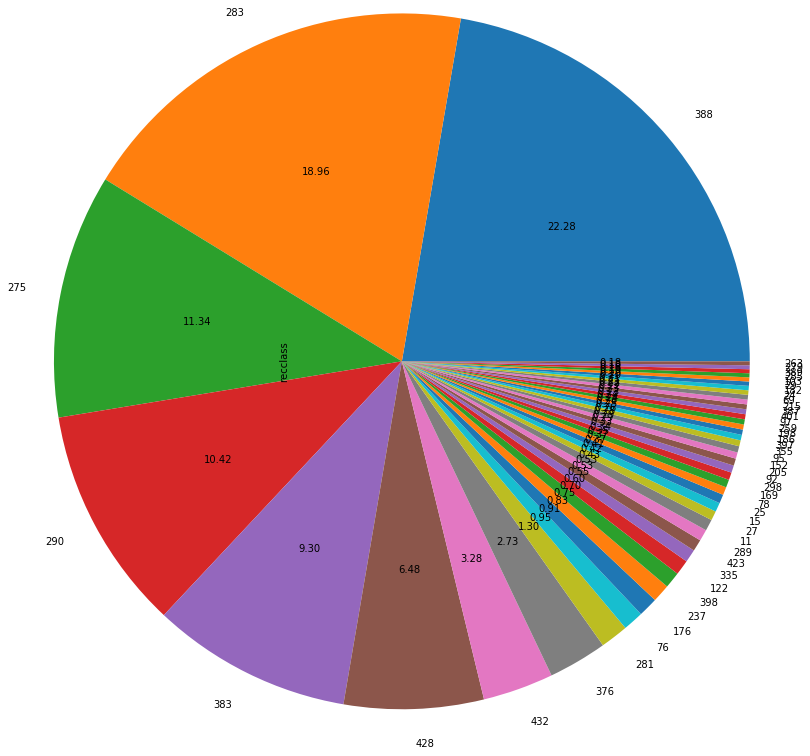

In [81]:
data_class = data['recclass'].value_counts()
data_class[data_class > 50.0].plot.pie(autopct='%.2f', radius=4)


This is the pie chart shown at the beginning of the notebook, where it exposed the very unbalanced distribution of classes on the original data.


In [82]:
import plotly.graph_objects as go
colors = ['orange', 'green', 'red', 'purple', 'brown','pink','gray','gold','blue']

data_class = smoteData['recclass'].value_counts()
data_class = data_class[data_class >0]
labels = data_class.index
values = data_class.values
fig = go.Figure(data=[go.Pie(labels=labels, values=values,showlegend=False, textinfo= 'none')])
fig.update_traces(marker=dict(colors=colors))
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
   
)

fig.show()

The classes distribution in the synthetic dataset is now almost perfectly balanced.

In [83]:
#Print the frequency of each class on the original dataset
data["recclass"].value_counts()[0:100]

388    6522
283    5549
275    3320
290    3050
383    2723
428    1897
432     961
376     799
281     380
76      279
176     265
237     244
398     220
122     205
335     176
423     160
289     156
11      155
27      127
15      124
25      121
78      108
169     107
298     102
92       99
205      97
152      86
95       86
355      81
397      75
       ... 
26       27
396      26
385      26
206      23
191      22
384      21
284      21
393      20
425      19
316      18
299      18
172      18
371      17
58       17
330      16
112      16
23       16
255      16
105      16
413      16
13       16
436      16
28       15
252      15
296      15
379      14
184      14
324      14
378      14
6        13
Name: recclass, Length: 100, dtype: int64

In [84]:
#Print the frequency of each class on the synthetic dataset
smoteData["recclass"].value_counts()[0:100]

283    6522
383    6522
290    6522
275    6522
428    6522
388    6522
184    6521
177    6521
171    6521
172    6521
174    6521
175    6521
176    6521
186    6521
183    6521
178    6521
168    6521
179    6521
181    6521
182    6521
185    6521
169    6521
452    6521
167    6521
188    6521
139    6521
142    6521
144    6521
146    6521
147    6521
       ... 
195    6521
196    6521
198    6521
205    6521
220    6521
206    6521
209    6521
210    6521
212    6521
213    6521
215    6521
216    6521
137    6521
129    6521
132    6521
41     6521
28     6521
29     6521
31     6521
33     6521
34     6521
35     6521
40     6521
42     6521
26     6521
44     6521
46     6521
49     6521
50     6521
52     6521
Name: recclass, Length: 100, dtype: int64

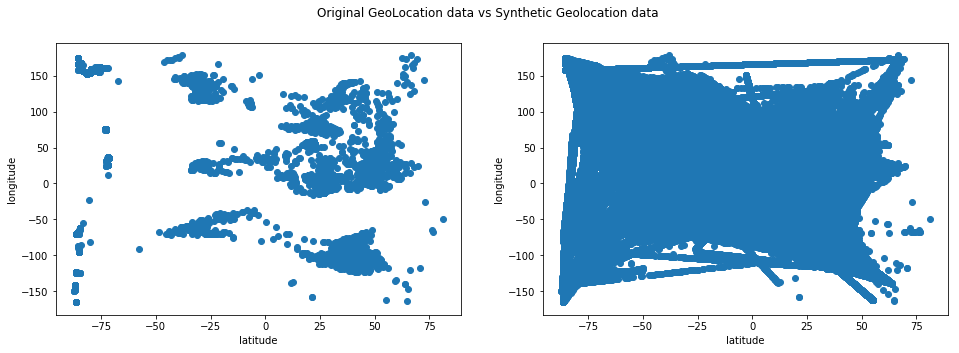

In [85]:
import numpy as np
import matplotlib.pyplot as plt

fig1, f1_axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5))

f1_axes[0].scatter(data["reclat"], data["reclong"])
fig1.suptitle('Original GeoLocation data vs Synthetic Geolocation data')

f1_axes[1].scatter(smoteData["reclat"], smoteData["reclong"])

for ax in f1_axes.flat:
    ax.set(xlabel='latitude', ylabel='longitude')
plt.show()

SMOTE works by finding the nearest neighbour of each data point and the randomly filling the space between until finally getting a more equally distributed data.

The scatter plot shows how the algoritm creates new samples only between the data points of the original dataset.



In [86]:
data[['recclass','recclass1','mass','year']].describe().loc[['mean','std','min','50%','max']]

,recclass,recclass1,mass,year
mean,312.751879,1.373634,1.678626e+04,1987.275971
std,96.072141,1.359336,6.273131e+05,24.692538
min,1.000000,1.000000,0.000000e+00,1688.000000
50%,290.000000,1.000000,3.000000e+01,1991.000000
max,452.000000,13.000000,6.000000e+07,2013.000000


In [87]:
smoteData[['recclass','recclass1','mass','year']].describe().loc[['mean','std','min','50%','max']]

,recclass,recclass1,mass,year
mean,214.791864,3.374955,3.698794e+04,1978.034651
std,129.121439,3.257213,7.545448e+05,32.198742
min,1.000000,1.000000,0.000000e+00,1688.000000
50%,206.000000,2.000000,1.880000e+02,1988.000000
max,452.000000,13.000000,6.000000e+07,2013.000000


By comparing the statistics of the original data vs synthetic we can see that the min and max values are the same however, as more data points are created in the synthetic dataset, the mean and std change.

In [0]:
#Finally save the synthetic data
smoteData.to_csv("output/Meteorite_Landings_Smote.csv")